### Librerías

In [7]:
import sys
import matplotlib.pyplot as plt
import simpleaudio as sa
import numpy as np

# %matplotlib widget

sys.path.append(
    "/Users/oscarjimenezbou/Library/Mobile Documents/com~apple~CloudDocs/Documents/University_projects/TDS"
)

In [8]:
from utils import continuous_time_plot, discrete_time_plot
from scipy.io import wavfile

### Ejercicio 2.1
- Representar señal en tiempo discreto y continuo 
- calcular la energía por tramas y representarla 

/var/folders/r4/_d0jbzx9629841ty8b0gfn040000gn/T/ipykernel_1651/846249342.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frecuencia, mi_voz = wavfile.read(mi_voz_fn)


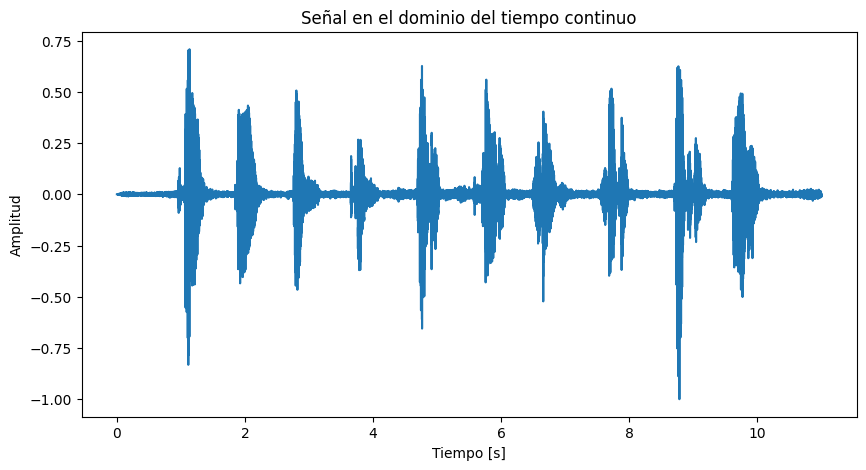

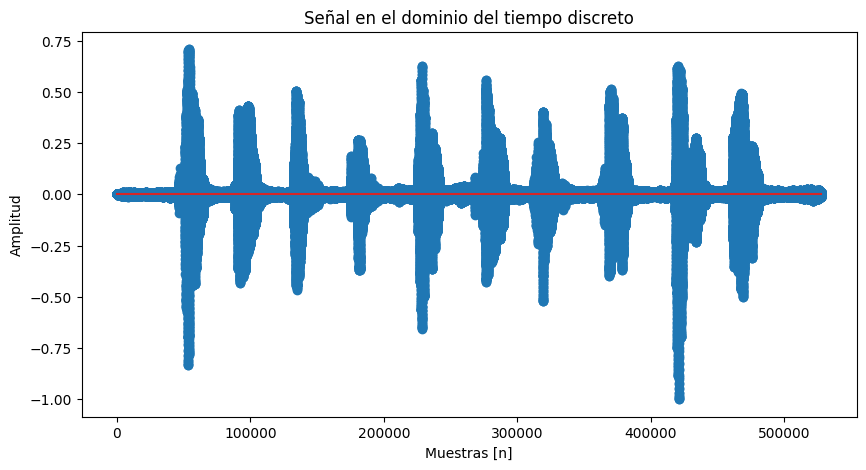

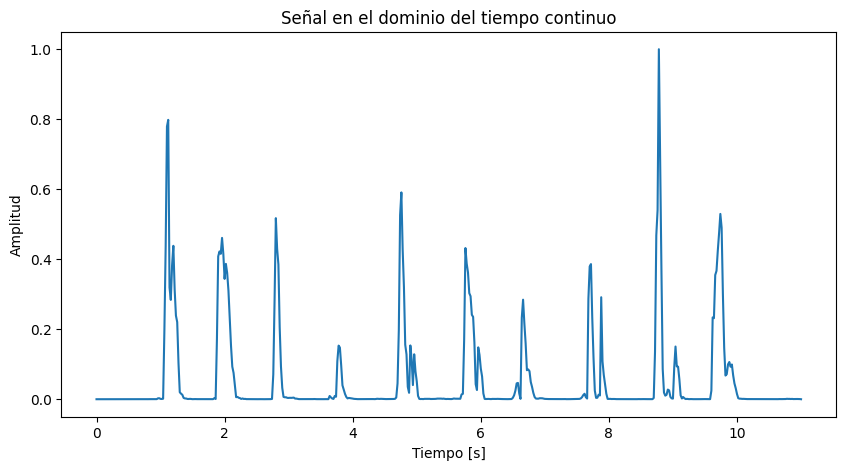

In [9]:
mi_voz_fn = "soundOscar.wav"

# plot the signal in the time domain continous and discrete
frecuencia, mi_voz = wavfile.read(mi_voz_fn)

# Change to mono
if len(mi_voz.shape) > 1:
    mi_voz = mi_voz.mean(axis=1)

# obtain the time vector
tiempo_continuo = np.arange(0, len(mi_voz) / frecuencia, 1 / frecuencia)

# normalize the signal with the maximum value
mi_voz = mi_voz / np.max(np.abs(mi_voz))

# plot the signal in continuous and discrete time
continuous_time_plot(
    tiempo_continuo, mi_voz, variable_name="Señal en el dominio del tiempo continuo"
)

discrete_time_plot(
    mi_voz, variable_name="Señal en el dominio del tiempo discreto")

# calculate the energy of the signal each 20ms
energy = []
for i in range(0, len(mi_voz), int(0.02 * frecuencia)):
    energy.append(np.sum(mi_voz[i: i + int(0.02 * frecuencia)] ** 2))

# normalize the energy
energy = energy / np.max(energy)

# plot the energy of the signal each 20ms in the time domain
tiempo_energia = np.arange(0, len(energy) * 0.02, 0.02)
continuous_time_plot(
    tiempo_energia, energy, variable_name="Energía de la señal cada 20ms"
)

# %matplotlib inline

### Ejercicio 2.2
- vector T_limites con inicio y fin de cada dígito en segundos
- vector N_limites  

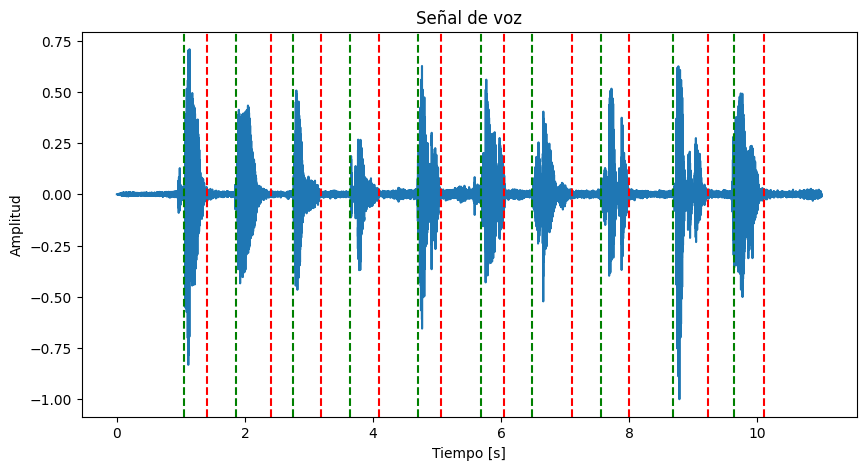

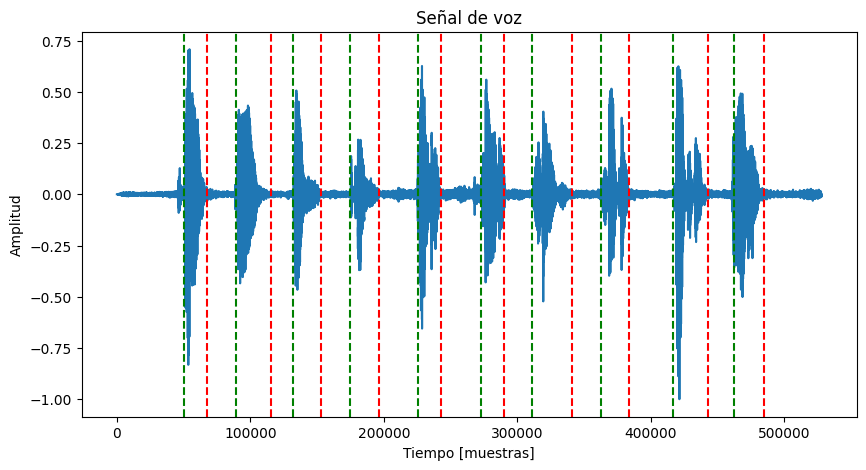

In [10]:
T_limites = [
    1.043,
    1.4,
    1.854,
    2.4,
    2.744,
    3.181,
    3.634,
    4.1,
    4.7,
    5.055,
    5.680,
    6.04,
    6.476,
    7.1,
    7.553,
    7.99,
    8.69,
    9.224,
    9.63,
    10.11,
]
t = T_limites[1:-1:2]
plt.figure(figsize=(10, 5))
plt.plot(tiempo_continuo, mi_voz)
for pos in T_limites[0::2]:
    plt.axvline(x=pos, color="g", linestyle="--")
for pos in T_limites[1::2]:
    plt.axvline(x=pos, color="r", linestyle="--")
plt.title("Señal de voz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.show()

N_limites = [int(frecuencia * t) for t in T_limites]

plt.figure(figsize=(10, 5))
plt.plot(mi_voz)
for pos in N_limites[0::2]:
    plt.axvline(x=pos, color="g", linestyle="--")
for pos in N_limites[1::2]:
    plt.axvline(x=pos, color="r", linestyle="--")
plt.title("Señal de voz")
plt.xlabel("Tiempo [muestras]")
plt.ylabel("Amplitud")
plt.show()

### Ejercicio 2.3
Segmentar la voz


In [14]:
# save each number in a file
cero = mi_voz[N_limites[0]: N_limites[1]]
uno = mi_voz[N_limites[2]: N_limites[3]]
dos = mi_voz[N_limites[4]: N_limites[5]]
tres = mi_voz[N_limites[6]: N_limites[7]]
cuatro = mi_voz[N_limites[8]: N_limites[9]]
cinco = mi_voz[N_limites[10]: N_limites[11]]
seis = mi_voz[N_limites[12]: N_limites[13]]
siete = mi_voz[N_limites[14]: N_limites[15]]
ocho = mi_voz[N_limites[16]: N_limites[17]]
nueve = mi_voz[N_limites[18]: N_limites[19]]

# add 0.5 seconds of silence at the beginning and the of each number
silence = np.zeros(int(0.5 * frecuencia))

cero = np.concatenate((silence, cero, silence))
uno = np.concatenate((silence, uno, silence))
dos = np.concatenate((silence, dos, silence))
tres = np.concatenate((silence, tres, silence))
cuatro = np.concatenate((silence, cuatro, silence))
cinco = np.concatenate((silence, cinco, silence))
seis = np.concatenate((silence, seis, silence))
siete = np.concatenate((silence, siete, silence))
ocho = np.concatenate((silence, ocho, silence))
nueve = np.concatenate((silence, nueve, silence))


# save each one in a file
wavfile.write("cero.wav", frecuencia, cero)
wavfile.write("uno.wav", frecuencia, uno)
wavfile.write("dos.wav", frecuencia, dos)
wavfile.write("tres.wav", frecuencia, tres)
wavfile.write("cuatro.wav", frecuencia, cuatro)
wavfile.write("cinco.wav", frecuencia, cinco)
wavfile.write("seis.wav", frecuencia, seis)
wavfile.write("siete.wav", frecuencia, siete)
wavfile.write("ocho.wav", frecuencia, ocho)
wavfile.write("nueve.wav", frecuencia, nueve)